In [37]:
import math
import scipy.stats
from scipy.stats import uniform
import numpy as np
from matplotlib import pyplot as plt

lower = 0
upper = 1
mu = 0.5
sigma = 0.1
N = 10000

samples = uniform.rvs(size = 10000)

samples_z = (samples - np.mean(samples))/np.std(samples)

transf = abs(samples_z)/max(abs(samples_z))


index = []
for i in range(10000):
    index.append(i)
    
def multiplyList(myList):
    """
    Takes the product of all complexity scores stored in a list created by the grand_coaltion function 
    """
    result = 1
    for x in myList:
        result = result * x
    return result
    
    


def grand_coalit(r = .07, k = 10000, n2 = 100):
    """
    executes V(S) formula from the paper
    
    parameters
    ----------
    
    r) interest rate
    k) amount of capital each coalition rents 
    n2) max size of coalition (how many times the loop runs)
    
    """
    comp_c = []
    comp_c_r = []
    coord_c = []
    coord_c_r = []
    tal_lst = []
    comp_lst = []
    shappy = []
    r = r
    k = k
    tally_0 = 0 
    for i in range(n2):
        loc = np.random.choice(index)
        coord = transf[loc]
        complexity = samples[loc]
        coord_c.append(coord)
        comp_c.append(complexity)
        total_comp = multiplyList(comp_c)
        comp_lst.append(total_comp/len(comp_c))
        total_coord = multiplyList(coord_c)
        total_comp = ((total_comp)/len(comp_c))*k
        total_coord = ((total_coord)/len(coord_c))*k
        tally = total_comp - total_coord - r*k
        shap = tally - tally_0
        tally_0 = tally
        tal_lst.append(tally)
        shappy.append(shap)

       
        r = r - r*((k + tally)/k)
        if(tally) < 0:
            break  
            
       

    return comp_c, tal_lst, comp_lst, shappy      
        
        
def simulate(n = 100, n2 = 100, **kwargs):
    """
    Simulates the formulation of the grand coaliton. 
    
    parameters
    ---------- 
    n) how many times to simulate the grand_coaltion formation above. 
    
    """
    avg = []
    len_ = []
    rng = []
    tally_ = []
    mems = []
    comp = []
    shap_daddy = []
    for i in range(n):
        x = grand_coalit()
        avg.append(np.mean(x[0]))
        len_.append(len(x[0]))
        rng.append(max(x[0]) - min(x[0]))
        mems.append(x[0])
        tally_.append(x[1])
        comp.append(x[2])
        shap_daddy.append(x[3])
    all_coalit = {"avg" : avg, "len" : len_, "rng" : rng, "tally" : tally_, "mems" : mems, 'comp': comp, 'shappy' : shap_daddy}
        
        
        
    return all_coalit
#mess with the interest rate and amount of capital here
test_dic = simulate(n = 1000, n2 = 10000, r = 1)


Text(0, 0.5, 'Coaliton size')

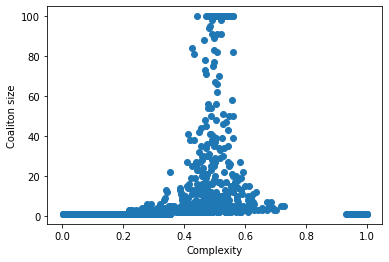

In [38]:
plt.scatter(test_dic['avg'], test_dic['len']) # we can see here that the coalitions which stuck together the longest have moderate average complexity. So in order to create large teams, which is important to innovation, too many low or high values is not an option.  
plt.xlabel('Complexity')
plt.ylabel('Coaliton size')


In [17]:
# I want to see what the association is between max profit and coalition complexity
# I want to get each players average contribution to the tally. Or I could get each players distance in complexity and average tally. 

#plt.scatter(test_dic['comp'][3], test_dic['tally'][3])
def big_players():
    """
    Gets the location of the players who contribute the most profit in each coalition and the their max profit differential
    
    """
    maxim_ind = []
    high = []
    for value in test_dic['shappy']:
        m = max(value)
        if len(value) > 1:
            for i in range(len(value)):
                if value[i] == m:
                    maxim_ind.append(i) 
                    high.append(value[i])
            
        else:
            high.append(value[0])
            maxim_ind.append(0)
    return high, maxim_ind
    
#now getting the complexity score fo each agent associated with the max 


    


In [20]:
def complex_players():
    """"
    gets complexity scores for those who contributed the most in profit in each simulated coalition
    """
    big_play = big_players()
    maxim_ind = big_play[1]
    best_player = []
    for i in range(len(test_dic['comp'])):
        m_ind = maxim_ind[i]
        value = test_dic['comp'][i][m_ind]
        best_player.append(value)
    return best_player


In [18]:
big_players()

([-7659.21840008428,
  -9135.735212667814,
  -9954.962134786076,
  1559.8632430472744,
  3479.3185812815573,
  -271.0026333581883,
  4092.3740247124124,
  -8133.749831492445,
  3912.2000793111565,
  -74.32299155935664,
  -8448.797550760386,
  3877.1320930540614,
  -6576.560385933886,
  2783.467367949827,
  1883.13280300297,
  -6294.3309623892865,
  -10615.472644927719,
  690.1827540742305,
  -540.6723782847004,
  -10116.439271008876,
  -401.5617423774057,
  -2090.6255373288946,
  3956.4103193920437,
  3134.6526113356085,
  2144.1986663055595,
  499.97330575811327,
  1380.9641688209276,
  3202.086770442928,
  488.9522617659321,
  3565.755815619432,
  -36.36057714133506,
  1942.1199649998516,
  2722.31140393315,
  1720.4918161666283,
  1069.7760430070248,
  -5480.829450824438,
  3152.7206468835093,
  2321.746959792407,
  -1011.8032306823221,
  -618.0312571100186,
  -7998.312529841821,
  -8893.493289461012,
  -4358.68855043903,
  -485.3833943228766,
  1990.0465816474116,
  872.93552135561

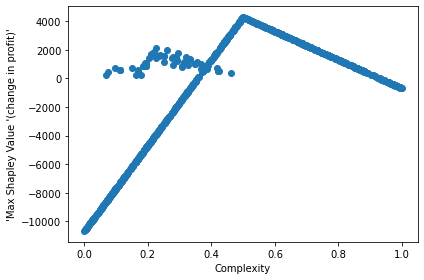

In [24]:
plt.scatter(complex_players(), big_players()[0])
plt.xlabel('Complexity')
plt.ylabel("'Max Shapley Value '(change in profit)'")
plt.tight_layout()
plt.savefig('complexity.png')
#plt.scatter(range(len(test_dic['len'])), test_dic['len'])